In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datafile = "LoanGrantingCleanedDatasetV6.csv"
raw_data = pd.read_csv(datafile, header=0)

In [3]:
#raw_data.head(20)

In [4]:
#raw_data.describe()

In [5]:
df = pd.DataFrame(raw_data)
# convert Loan Status into discrete numeric values
df["Loan Status"] = df["Loan Status"].replace("Charged Off", '0')
df["Loan Status"] = df["Loan Status"].replace("Fully Paid", '1')
df["Loan Status"] = df["Loan Status"].astype('int')
# convert Term into discrete numeric values
df["Term"] = df["Term"].replace("Short Term", '0')
df["Term"] = df["Term"].replace("Long Term", '1')
df["Term"] = df["Term"].astype('int')
# convert Home Ownership to discrete numeric values
df["Home Ownership"] = df["Home Ownership"].replace("Rent", '0')
df["Home Ownership"] = df["Home Ownership"].replace("Home Mortgage", '1')
df["Home Ownership"] = df["Home Ownership"].replace("HaveMortgage", '1')
df["Home Ownership"] = df["Home Ownership"].replace("Own Home", '2')
df["Home Ownership"] = df["Home Ownership"].astype('int')
# handle missing value in Credit Score
df["Credit Score"] = df["Credit Score"].apply(lambda x: x if x>0 else np.nan)
df = df.dropna()
df.describe()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,67572.000000,6.757200e+04,67572.000000,67572.000000,67572.000000,67572.00000,6.757200e+04,67572.000000,67572.000000,67572.000000,67572.000000,67572.000000,6.757200e+04,6.757200e+04,67572.000000,67572.000000
mean,0.716909,1.886234e+07,0.247884,721.601951,5.629003,0.67118,7.234575e+04,962.637685,18.326576,15.942402,11.123557,0.160125,1.544597e+04,3.490724e+04,0.112221,0.028681
std,0.450503,3.910672e+07,0.431787,27.427709,3.746769,0.63545,5.836101e+04,638.508968,7.040868,22.914806,4.991908,0.475961,1.991152e+04,3.411100e+05,0.343094,0.263467
min,0.000000,5.110000e+02,0.000000,585.000000,0.000000,0.00000,4.033000e+03,0.000000,3.800000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000,8.834750e+03,0.000000,710.000000,2.000000,0.00000,4.458600e+04,532.677500,13.500000,0.000000,8.000000,0.000000,5.965000e+03,1.278800e+04,0.000000,0.000000
50%,1.000000,1.499300e+04,0.000000,730.000000,6.000000,1.00000,6.149400e+04,843.630000,17.000000,0.000000,10.000000,0.000000,1.108900e+04,2.184100e+04,0.000000,0.000000
75%,1.000000,2.818125e+04,0.000000,741.000000,10.000000,1.00000,8.675025e+04,1249.425000,21.800000,29.000000,14.000000,0.000000,1.931825e+04,3.647525e+04,0.000000,0.000000
max,1.000000,1.000000e+08,1.000000,751.000000,10.000000,2.00000,8.713547e+06,22939.120000,70.500000,176.000000,76.000000,15.000000,1.730472e+06,6.998809e+07,7.000000,15.000000


In [6]:
df.corr()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Loan Status,1.000000,0.302857,-0.179719,0.254803,0.017335,0.043064,0.062136,-0.018470,0.038907,0.004565,-0.016218,-0.010971,0.008734,0.010189,0.001405,-0.012764
Current Loan Amount,0.302857,1.000000,-0.052818,0.072476,0.002919,0.006601,0.013253,-0.007072,0.015657,-0.002133,0.000232,0.005420,0.003333,-0.002780,0.006328,0.001393
Term,-0.179719,-0.052818,1.000000,-0.484224,0.076074,0.070158,0.068252,0.149920,0.034996,-0.004438,0.079271,-0.022835,0.091408,0.009286,-0.027742,-0.002003
Credit Score,0.254803,0.072476,-0.484224,1.000000,-0.015694,0.035336,0.011361,-0.088383,0.086508,-0.055479,-0.031069,-0.052908,-0.010812,0.017630,-0.039670,-0.022629
Years in current job,0.017335,0.002919,0.076074,-0.015694,1.000000,0.139315,0.098594,0.147905,0.151990,0.039326,0.065107,0.018715,0.100348,0.004228,0.017272,0.006671
Home Ownership,0.043064,0.006601,0.070158,0.035336,0.139315,1.000000,0.101181,0.127198,0.171906,0.017661,0.097495,0.009729,0.122695,0.022844,0.002745,0.008862
Annual Income,0.062136,0.013253,0.068252,0.011361,0.098594,0.101181,1.000000,0.463605,0.151185,0.012462,0.139974,-0.013639,0.290915,0.045206,-0.047452,0.042752
Monthly Debt,-0.018470,-0.007072,0.149920,-0.088383,0.147905,0.127198,0.463605,1.000000,0.191129,0.008433,0.407671,-0.050358,0.472836,0.046399,-0.078065,0.023602
Years of Credit History,0.038907,0.015657,0.034996,0.086508,0.151990,0.171906,0.151185,0.191129,1.000000,0.087684,0.128385,0.056954,0.199831,0.031660,0.058430,0.019540
Months since last delinquent,0.004565,-0.002133,-0.004438,-0.055479,0.039326,0.017661,0.012462,0.008433,0.087684,1.000000,0.031506,0.075711,-0.068893,-0.009650,0.054852,0.027745


In [7]:
df.columns.tolist()

['Loan ID',
 'Customer ID',
 'Loan Status',
 'Current Loan Amount',
 'Term',
 'Credit Score',
 'Years in current job',
 'Home Ownership',
 'Annual Income',
 'Purpose',
 'Monthly Debt',
 'Years of Credit History',
 'Months since last delinquent',
 'Number of Open Accounts',
 'Number of Credit Problems',
 'Current Credit Balance',
 'Maximum Open Credit',
 'Bankruptcies',
 'Tax Liens']

In [8]:
df.dtypes

Loan ID                          object
Customer ID                      object
Loan Status                       int64
Current Loan Amount               int64
Term                              int64
Credit Score                    float64
Years in current job              int64
Home Ownership                    int64
Annual Income                     int64
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent      int64
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Maximum Open Credit               int64
Bankruptcies                      int64
Tax Liens                         int64
dtype: object

In [9]:
df.describe()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,67572.000000,6.757200e+04,67572.000000,67572.000000,67572.000000,67572.00000,6.757200e+04,67572.000000,67572.000000,67572.000000,67572.000000,67572.000000,6.757200e+04,6.757200e+04,67572.000000,67572.000000
mean,0.716909,1.886234e+07,0.247884,721.601951,5.629003,0.67118,7.234575e+04,962.637685,18.326576,15.942402,11.123557,0.160125,1.544597e+04,3.490724e+04,0.112221,0.028681
std,0.450503,3.910672e+07,0.431787,27.427709,3.746769,0.63545,5.836101e+04,638.508968,7.040868,22.914806,4.991908,0.475961,1.991152e+04,3.411100e+05,0.343094,0.263467
min,0.000000,5.110000e+02,0.000000,585.000000,0.000000,0.00000,4.033000e+03,0.000000,3.800000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000,8.834750e+03,0.000000,710.000000,2.000000,0.00000,4.458600e+04,532.677500,13.500000,0.000000,8.000000,0.000000,5.965000e+03,1.278800e+04,0.000000,0.000000
50%,1.000000,1.499300e+04,0.000000,730.000000,6.000000,1.00000,6.149400e+04,843.630000,17.000000,0.000000,10.000000,0.000000,1.108900e+04,2.184100e+04,0.000000,0.000000
75%,1.000000,2.818125e+04,0.000000,741.000000,10.000000,1.00000,8.675025e+04,1249.425000,21.800000,29.000000,14.000000,0.000000,1.931825e+04,3.647525e+04,0.000000,0.000000
max,1.000000,1.000000e+08,1.000000,751.000000,10.000000,2.00000,8.713547e+06,22939.120000,70.500000,176.000000,76.000000,15.000000,1.730472e+06,6.998809e+07,7.000000,15.000000


In [10]:
df["Purpose"].unique()

array(['Debt Consolidation', 'Home Improvements', 'other', 'Business Loan',
       'small_business', 'Other', 'moving', 'Buy a Car', 'Medical Bills',
       'Buy House', 'Take a Trip', 'vacation', 'major_purchase',
       'Educational Expenses', 'wedding', 'renewable_energy'], dtype=object)

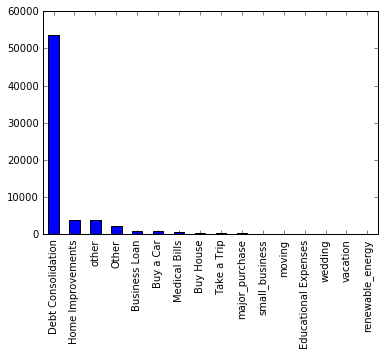

In [11]:
df["Purpose"].value_counts().plot(kind='bar')

/Users/Jerry/anaconda/lib/python2.7/site-packages/pandas/tools/plotting.py:3003: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  ylabelsize=ylabelsize, yrot=yrot, **kwds)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d28e4d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d1c38d0>]], dtype=object)

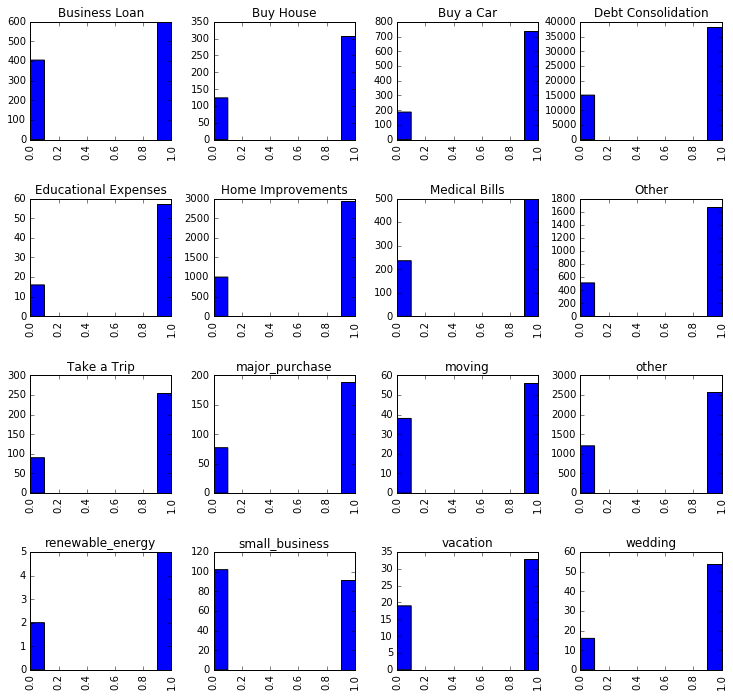

In [12]:
# conditional histogram
g_df = df.groupby(["Loan Status"])
fig = plt.figure(figsize=(12, 12))
fig.clf()
ax = fig.gca()
df["Loan Status"].hist(by=df["Purpose"], ax=ax)

In [13]:
# convert Purpose into discrete numeric values
df["Purpose"] = df["Purpose"].replace("Debt Consolidation", '1')
df["Purpose"] = df["Purpose"].replace("Buy a Car", '1')
df["Purpose"] = df["Purpose"].replace("Buy House", '1')
df["Purpose"] = df["Purpose"].replace("Other", '1')
df["Purpose"] = df["Purpose"].replace("Medical Bills", '1')
df["Purpose"] = df["Purpose"].replace("Home Improvements", '1')
df["Purpose"] = df["Purpose"].replace("Educational Expenses", '1')
df["Purpose"] = df["Purpose"].replace("other", '1')
df["Purpose"] = df["Purpose"].replace("Take a Trip", '1')
df["Purpose"] = df["Purpose"].replace("major_purchase", '1')
df["Purpose"] = df["Purpose"].replace("wedding", '1')
df["Purpose"] = df["Purpose"].replace("vacation", '1')
df["Purpose"] = df["Purpose"].replace("[^0-9]", '0', regex=True)
df["Purpose"] = df["Purpose"].astype(int)
df["Purpose"].unique()

array([1, 0])

/Users/Jerry/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared


'Done'

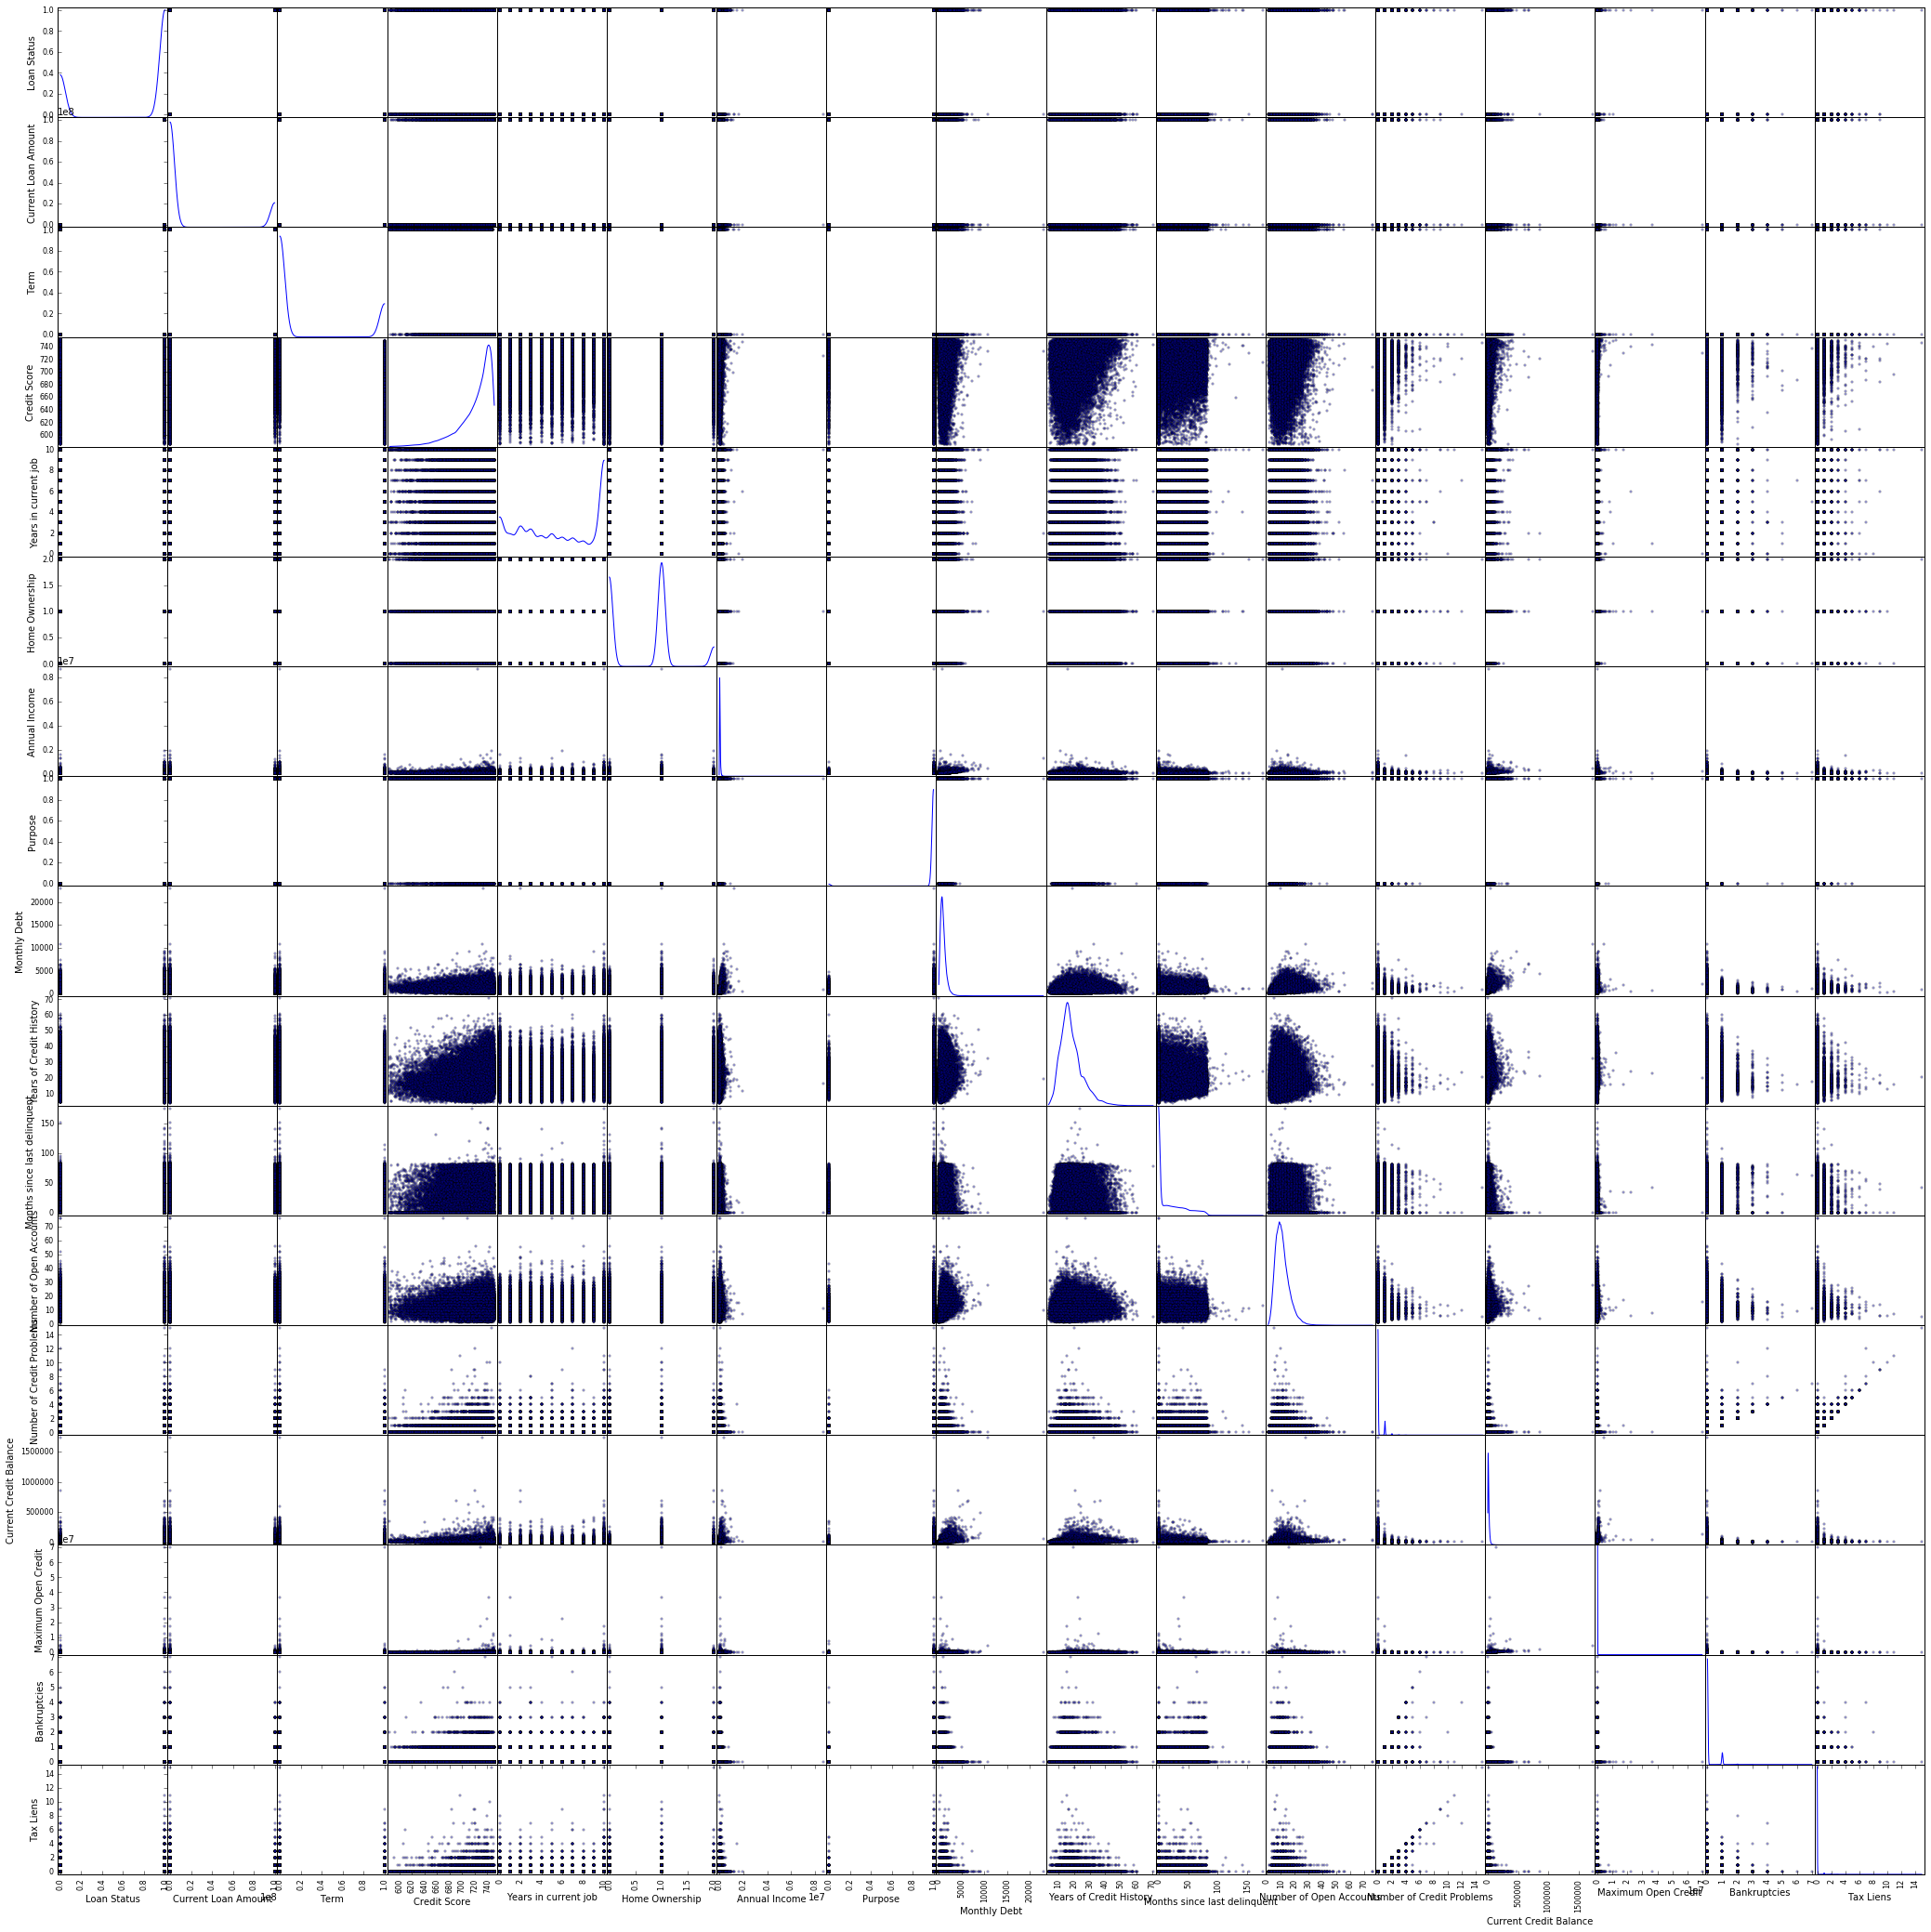

In [14]:
## Create pair-wise scatter plots         
def auto_pairs(plot_cols, df):
    import matplotlib.pyplot as plt
    from pandas.tools.plotting import scatter_matrix
    fig = plt.figure(figsize=(36, 36))
    fig.clf()
    ax = fig.gca()
    scatter_matrix(df[plot_cols], alpha=0.3, 
               diagonal='kde', ax = ax)
    return 'Done' 

## Numeric columns
plot_cols = df.columns.tolist()#.remove("Purpose")

auto_pairs(plot_cols, df)

'Loan Status'

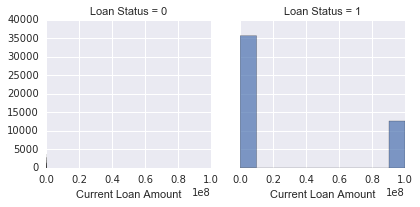

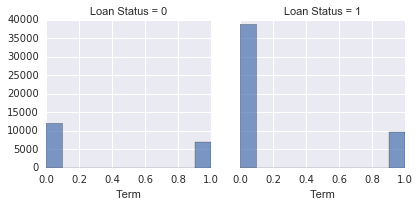

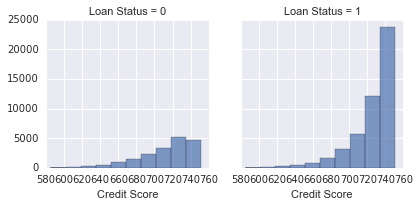

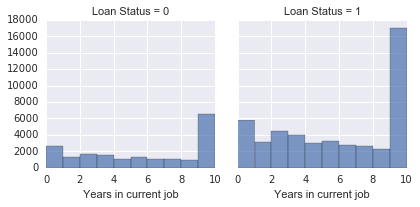

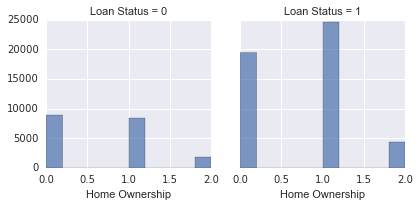

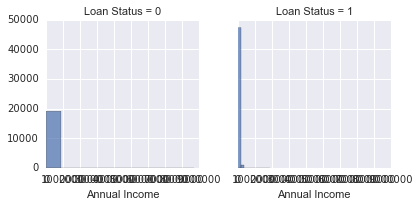

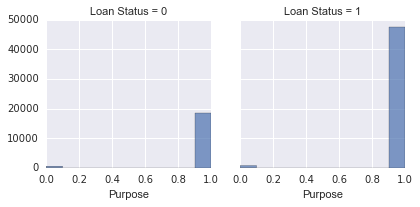

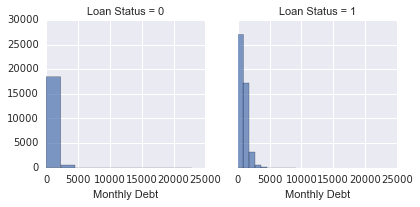

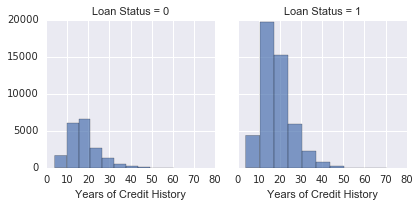

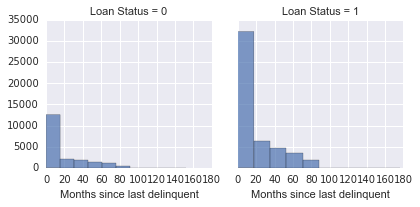

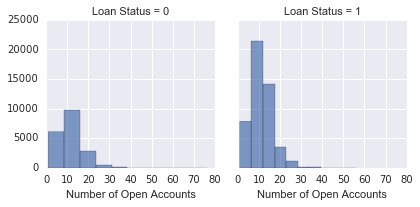

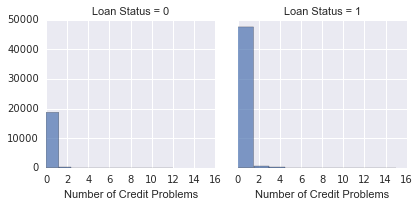

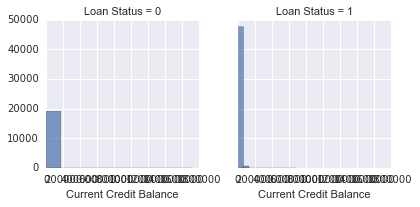

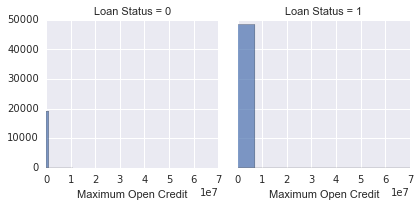

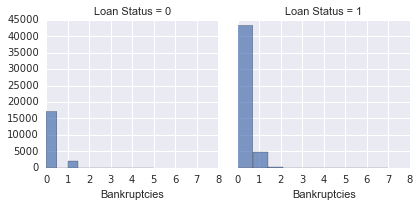

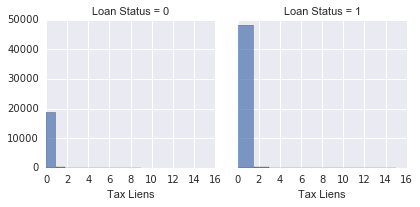

In [15]:
## Function to plot conditioned histograms
def cond_hists(df, plot_cols, grid_col):
    import matplotlib.pyplot as plt
    import seaborn as sns
    ## Loop over the list of columns
    for col in plot_cols:
        grid1 = sns.FacetGrid(df, col=grid_col)
        grid1.map(plt.hist, col, alpha=.7)
    return grid_col

## Define columns for making a conditioned histogram
plot_cols2 = df.columns.tolist()
plot_cols2.remove("Loan Status")
plot_cols2.remove("Loan ID")
plot_cols2.remove("Customer ID")

cond_hists(df, plot_cols2, 'Loan Status')

In [16]:
df.corr()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Loan Status,1.000000,0.302857,-0.179719,0.254803,0.017335,0.043064,0.062136,0.042971,-0.018470,0.038907,0.004565,-0.016218,-0.010971,0.008734,0.010189,0.001405,-0.012764
Current Loan Amount,0.302857,1.000000,-0.052818,0.072476,0.002919,0.006601,0.013253,0.015072,-0.007072,0.015657,-0.002133,0.000232,0.005420,0.003333,-0.002780,0.006328,0.001393
Term,-0.179719,-0.052818,1.000000,-0.484224,0.076074,0.070158,0.068252,-0.007053,0.149920,0.034996,-0.004438,0.079271,-0.022835,0.091408,0.009286,-0.027742,-0.002003
Credit Score,0.254803,0.072476,-0.484224,1.000000,-0.015694,0.035336,0.011361,0.077973,-0.088383,0.086508,-0.055479,-0.031069,-0.052908,-0.010812,0.017630,-0.039670,-0.022629
Years in current job,0.017335,0.002919,0.076074,-0.015694,1.000000,0.139315,0.098594,0.023984,0.147905,0.151990,0.039326,0.065107,0.018715,0.100348,0.004228,0.017272,0.006671
Home Ownership,0.043064,0.006601,0.070158,0.035336,0.139315,1.000000,0.101181,0.012588,0.127198,0.171906,0.017661,0.097495,0.009729,0.122695,0.022844,0.002745,0.008862
Annual Income,0.062136,0.013253,0.068252,0.011361,0.098594,0.101181,1.000000,-0.026604,0.463605,0.151185,0.012462,0.139974,-0.013639,0.290915,0.045206,-0.047452,0.042752
Purpose,0.042971,0.015072,-0.007053,0.077973,0.023984,0.012588,-0.026604,1.000000,0.026854,0.002452,-0.001227,0.038346,0.003589,0.008741,-0.003637,0.014664,-0.007273
Monthly Debt,-0.018470,-0.007072,0.149920,-0.088383,0.147905,0.127198,0.463605,0.026854,1.000000,0.191129,0.008433,0.407671,-0.050358,0.472836,0.046399,-0.078065,0.023602
Years of Credit History,0.038907,0.015657,0.034996,0.086508,0.151990,0.171906,0.151185,0.002452,0.191129,1.000000,0.087684,0.128385,0.056954,0.199831,0.031660,0.058430,0.019540


'Done'

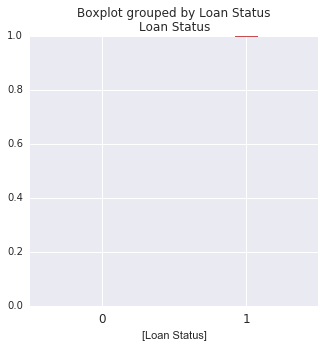

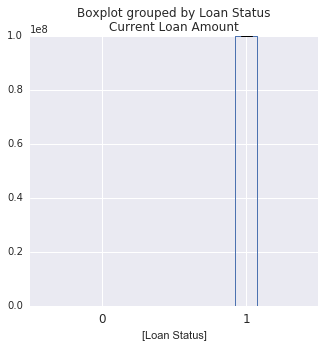

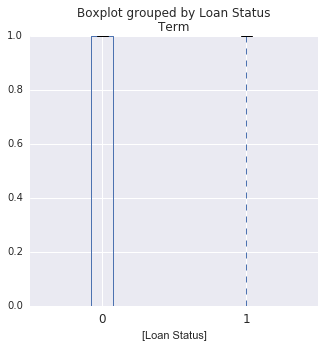

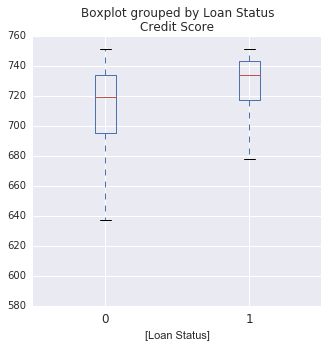

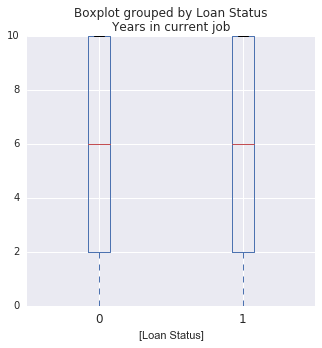

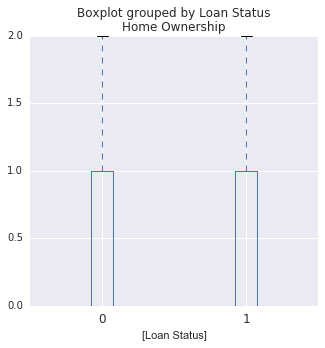

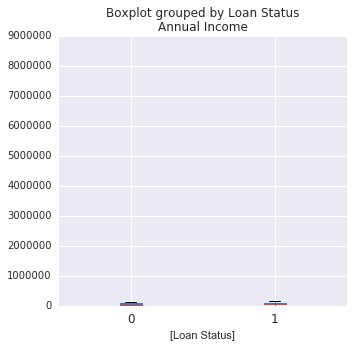

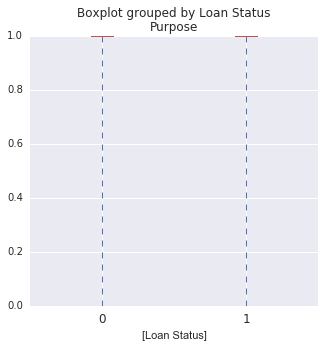

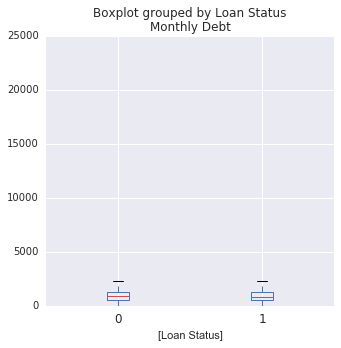

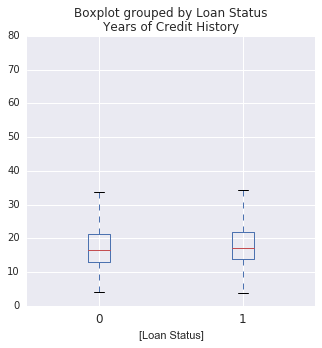

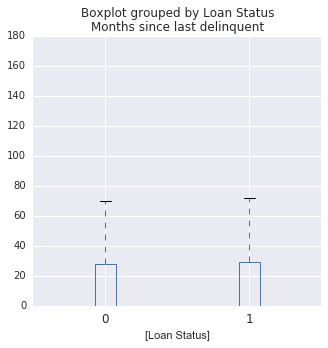

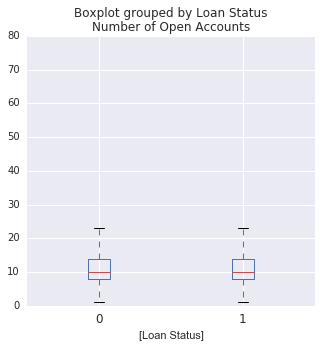

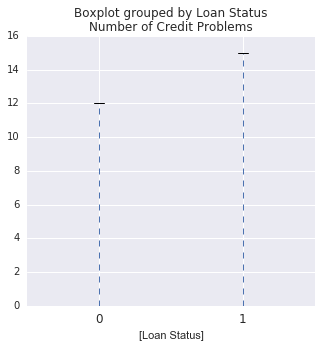

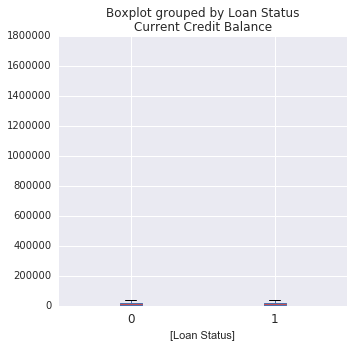

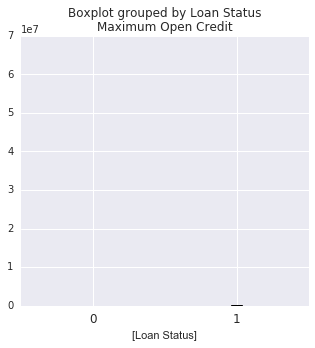

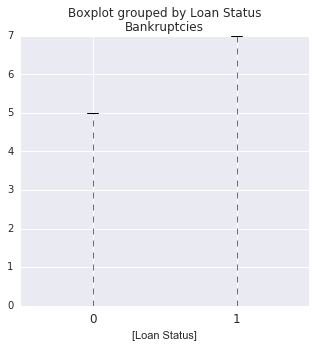

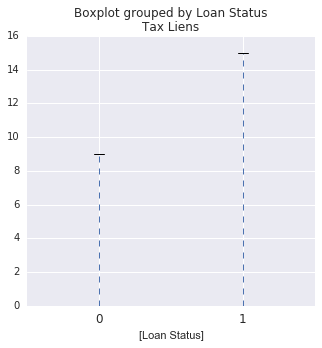

In [17]:
## Plot categorical variables as box plots
def income_boxplot(df):
    import numpy as np
    import matplotlib.pyplot as plt
    
    cols = df.columns.tolist()
    for col in cols:
        if(df[col].dtype in [np.int64, np.int32, np.float64]):                  
            fig = plt.figure(figsize = (5,5))
            fig.clf()
            ax = fig.gca() 
            df.boxplot(column = [col], ax = ax, by = ['Loan Status'])          
    return('Done') 

income_boxplot(df)

In [18]:
df.describe()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,67572.000000,6.757200e+04,67572.000000,67572.000000,67572.000000,67572.00000,6.757200e+04,67572.000000,67572.000000,67572.000000,67572.000000,67572.000000,67572.000000,6.757200e+04,6.757200e+04,67572.000000,67572.000000
mean,0.716909,1.886234e+07,0.247884,721.601951,5.629003,0.67118,7.234575e+04,0.980791,962.637685,18.326576,15.942402,11.123557,0.160125,1.544597e+04,3.490724e+04,0.112221,0.028681
std,0.450503,3.910672e+07,0.431787,27.427709,3.746769,0.63545,5.836101e+04,0.137260,638.508968,7.040868,22.914806,4.991908,0.475961,1.991152e+04,3.411100e+05,0.343094,0.263467
min,0.000000,5.110000e+02,0.000000,585.000000,0.000000,0.00000,4.033000e+03,0.000000,0.000000,3.800000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000,8.834750e+03,0.000000,710.000000,2.000000,0.00000,4.458600e+04,1.000000,532.677500,13.500000,0.000000,8.000000,0.000000,5.965000e+03,1.278800e+04,0.000000,0.000000
50%,1.000000,1.499300e+04,0.000000,730.000000,6.000000,1.00000,6.149400e+04,1.000000,843.630000,17.000000,0.000000,10.000000,0.000000,1.108900e+04,2.184100e+04,0.000000,0.000000
75%,1.000000,2.818125e+04,0.000000,741.000000,10.000000,1.00000,8.675025e+04,1.000000,1249.425000,21.800000,29.000000,14.000000,0.000000,1.931825e+04,3.647525e+04,0.000000,0.000000
max,1.000000,1.000000e+08,1.000000,751.000000,10.000000,2.00000,8.713547e+06,1.000000,22939.120000,70.500000,176.000000,76.000000,15.000000,1.730472e+06,6.998809e+07,7.000000,15.000000


,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,54834.000000,54834.000000,54834.000000,54834.000000,54834.000000,54834.000000,5.483400e+04,54834.000000,54834.000000,54834.000000,54834.000000,54834.000000,54834.000000,5.483400e+04,5.483400e+04,54834.000000,54834.000000
mean,0.651147,13967.584382,0.258890,720.643342,5.623774,0.669165,7.197461e+04,0.979794,964.836682,18.273533,15.965915,11.123081,0.158880,1.541450e+04,3.536531e+04,0.111172,0.028504
std,0.476612,8242.724227,0.438029,27.927297,3.750762,0.636854,6.042844e+04,0.140707,638.761663,7.021124,22.899134,4.983910,0.475271,2.004016e+04,3.770883e+05,0.341915,0.264235
min,0.000000,511.000000,0.000000,585.000000,0.000000,0.000000,4.033000e+03,0.000000,0.000000,3.900000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000,7822.000000,0.000000,709.000000,2.000000,0.000000,4.439800e+04,1.000000,535.560000,13.500000,0.000000,8.000000,0.000000,5.992000e+03,1.271425e+04,0.000000,0.000000
50%,1.000000,12062.000000,0.000000,730.000000,6.000000,1.000000,6.127800e+04,1.000000,847.335000,17.000000,0.000000,10.000000,0.000000,1.111700e+04,2.167600e+04,0.000000,0.000000
75%,1.000000,19454.750000,1.000000,741.000000,10.000000,1.000000,8.617375e+04,1.000000,1251.277500,21.800000,29.000000,14.000000,0.000000,1.927500e+04,3.621375e+04,0.000000,0.000000
max,1.000000,35872.000000,1.000000,751.000000,10.000000,2.000000,8.713547e+06,1.000000,22939.120000,70.500000,176.000000,76.000000,15.000000,1.730472e+06,6.998809e+07,7.000000,15.000000


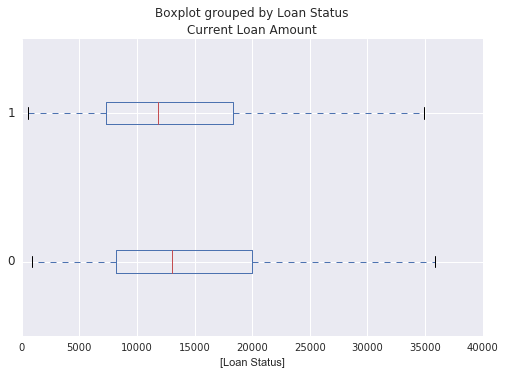

In [22]:
CLA_limit = 1e5
df["Current Loan Amount"] = df["Current Loan Amount"].apply(lambda x: x if x<1e5 else np.nan)
df = df.dropna()
df.boxplot(column="Current Loan Amount", vert=False, by=["Loan Status"])
df.describe()

In [ ]:
df